In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Replace 'title.ratings.tsv.gz' with the actual file path
imdb_ratings = pd.read_csv('title.ratings.tsv.gz', sep='\t', low_memory=False)

movie_basics = pd.read_csv('title.basics.tsv.gz', sep='\t', low_memory=False)


In [85]:
print(imdb_ratings.head())

      tconst  averageRating  numVotes
0  tt0000001           5.70      2015
1  tt0000002           5.70       272
2  tt0000003           6.50      1935
3  tt0000004           5.40       179
4  tt0000005           6.20      2706


In [86]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384137 entries, 0 to 1384136
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1384137 non-null  object 
 1   averageRating  1384137 non-null  float64
 2   numVotes       1384137 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 31.7+ MB


In [87]:
imdb_ratings.columns = ["ID", "Average Rating", "Number of Ratings"]
print(imdb_ratings.head())

          ID  Average Rating  Number of Ratings
0  tt0000001            5.70               2015
1  tt0000002            5.70                272
2  tt0000003            6.50               1935
3  tt0000004            5.40                179
4  tt0000005            6.20               2706


In [88]:
#Check if there are any titles that don't have ratings
imdb_ratings.isnull().sum()

ID                   0
Average Rating       0
Number of Ratings    0
dtype: int64

In [89]:
movie_basics.columns = ["ID", "Title Type", "Primary Title", "Original Title", "Is Adult", "Start Year", "End Year", "Runtime (minutes)", "Genres"]
movie_basics

,ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,End Year,Runtime (minutes),Genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10432626,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
10432627,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
10432628,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
10432629,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [90]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10432631 entries, 0 to 10432630
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   ID                 object
 1   Title Type         object
 2   Primary Title      object
 3   Original Title     object
 4   Is Adult           object
 5   Start Year         object
 6   End Year           object
 7   Runtime (minutes)  object
 8   Genres             object
dtypes: object(9)
memory usage: 716.4+ MB


In [91]:
movie_basics.describe()

,ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,End Year,Runtime (minutes),Genres
count,10432631,10432631,10432614,10432614,10432631,10432631,10432631,10432631,10432613
unique,10432631,11,4683306,4706350,12,153,96,940,2358
top,tt0000001,tvEpisode,Episode #1.1,Episode #1.1,0,\N,\N,\N,Drama
freq,1,7969517,50018,50018,10101701,1388747,10316202,7268233,1195407


In [92]:
#Convert Numerical Columns 
movie_basics['Start Year'] = pd.to_numeric(movie_basics['Start Year'], errors='coerce').astype('Int64')
movie_basics['End Year'] = pd.to_numeric(movie_basics['End Year'], errors='coerce').astype('Int64')
movie_basics['Runtime (minutes)'] = pd.to_numeric(movie_basics['Runtime (minutes)'], errors='coerce')

In [93]:
movie_basics.isnull().sum()

ID                          0
Title Type                  0
Primary Title              17
Original Title             17
Is Adult                    0
Start Year            1388747
End Year             10316202
Runtime (minutes)     7268251
Genres                     18
dtype: int64

In [94]:
movie_basics

,ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,End Year,Runtime (minutes),Genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,<NA>,1.00,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,<NA>,5.00,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,<NA>,4.00,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,<NA>,12.00,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,<NA>,1.00,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10432626,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,<NA>,NaN,"Action,Drama,Family"
10432627,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,<NA>,NaN,"Action,Drama,Family"
10432628,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,<NA>,NaN,"Action,Drama,Family"
10432629,tt9916856,short,The Wind,The Wind,0,2015,<NA>,27.00,Short


In [95]:
# Assuming movie_basics is your DataFrame and isAdult is the column name
unique_values = movie_basics['Is Adult'].unique()
print(unique_values)


['0' '1' '2019' '1981' '2020' '2017' '\\N' '2023' '2022' '2011' '2014'
 '2005']


In [96]:
# Replace values that are not '0' or '1' with NaN
movie_basics['Is Adult'] = pd.to_numeric(movie_basics['Is Adult'], errors='coerce')

# Any value that is not 0 or 1 is now NaN. Convert the column to boolean
# NaN values will remain as NaN
movie_basics['Is Adult'] = movie_basics['Is Adult'].map({0: False, 1: True})

# Check the unique values again
print(movie_basics['Is Adult'].unique())

# Check the DataFrame
print(movie_basics)

[False True nan]
                 ID Title Type              Primary Title  \
0         tt0000001      short                 Carmencita   
1         tt0000002      short     Le clown et ses chiens   
2         tt0000003      short             Pauvre Pierrot   
3         tt0000004      short                Un bon bock   
4         tt0000005      short           Blacksmith Scene   
...             ...        ...                        ...   
10432626  tt9916848  tvEpisode              Episode #3.17   
10432627  tt9916850  tvEpisode              Episode #3.19   
10432628  tt9916852  tvEpisode              Episode #3.20   
10432629  tt9916856      short                   The Wind   
10432630  tt9916880  tvEpisode  Horrid Henry Knows It All   

                     Original Title Is Adult  Start Year  End Year  \
0                        Carmencita    False        1894      <NA>   
1            Le clown et ses chiens    False        1892      <NA>   
2                    Pauvre Pierrot    F

In [97]:
# Assuming movie_basics is your DataFrame and isAdult is the column name
unique_filmtypes = movie_basics['Title Type'].unique()
print(unique_filmtypes)

['short' 'movie' 'tvShort' 'tvMovie' 'tvSeries' 'tvEpisode' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame' 'tvPilot']


In [98]:
filtered_movies.isnull().sum()

ID                        0
Title Type                0
Primary Title             0
Original Title            0
Is Adult                  0
Start Year                0
End Year             632049
Runtime (minutes)    151053
Genres                    0
dtype: int64

In [99]:
filtered_movies

,ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,End Year,Runtime (minutes),Genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,False,1894,<NA>,45.00,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,False,1897,<NA>,100.00,"Documentary,News,Sport"
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,False,1906,<NA>,70.00,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,False,1907,<NA>,90.00,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,False,1907,<NA>,NaN,Drama
...,...,...,...,...,...,...,...,...,...
10432549,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,False,2007,<NA>,100.00,Documentary
10432554,tt9916692,tvMovie,Teatroteka: Czlowiek bez twarzy,Teatroteka: Czlowiek bez twarzy,False,2015,<NA>,66.00,Drama
10432561,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,False,2013,<NA>,NaN,Comedy
10432571,tt9916730,movie,6 Gunn,6 Gunn,False,2017,<NA>,116.00,Drama


In [100]:
#Keep only movies with a known start year
filtered_movies = filtered_movies.dropna(subset=['Start Year'])

#Keep movies that have a title
filtered_movies = filtered_movies[filtered_movies['Primary Title'].notna() & filtered_movies['Original Title'].notna()]

filtered_movies.info()
filtered_movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 632049 entries, 8 to 10432581
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 632049 non-null  object 
 1   Title Type         632049 non-null  object 
 2   Primary Title      632049 non-null  object 
 3   Original Title     632049 non-null  object 
 4   Is Adult           632049 non-null  object 
 5   Start Year         632049 non-null  Int64  
 6   End Year           0 non-null       Int64  
 7   Runtime (minutes)  480996 non-null  float64
 8   Genres             632049 non-null  object 
dtypes: Int64(2), float64(1), object(6)
memory usage: 49.4+ MB


ID                        0
Title Type                0
Primary Title             0
Original Title            0
Is Adult                  0
Start Year                0
End Year             632049
Runtime (minutes)    151053
Genres                    0
dtype: int64

In [101]:
# Assuming movie_basics is your DataFrame and isAdult is the column name
unique_genres = filtered_movies['Genres'].unique()
print(len(unique_genres))

1484


In [102]:
# Filter out rows where 'Genres' column has '\N'
filtered_movies = filtered_movies[filtered_movies['Genres'] != '\\N']

filtered_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632049 entries, 8 to 10432581
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 632049 non-null  object 
 1   Title Type         632049 non-null  object 
 2   Primary Title      632049 non-null  object 
 3   Original Title     632049 non-null  object 
 4   Is Adult           632049 non-null  object 
 5   Start Year         632049 non-null  Int64  
 6   End Year           0 non-null       Int64  
 7   Runtime (minutes)  480996 non-null  float64
 8   Genres             632049 non-null  object 
dtypes: Int64(2), float64(1), object(6)
memory usage: 49.4+ MB


In [103]:
merged_df = pd.merge(filtered_movies, imdb_ratings, on="ID", how='inner')
merged_df

,ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,End Year,Runtime (minutes),Genres,Average Rating,Number of Ratings
0,tt0000009,movie,Miss Jerry,Miss Jerry,False,1894,<NA>,45.00,Romance,5.30,207
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,False,1897,<NA>,100.00,"Documentary,News,Sport",5.30,489
2,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,False,1906,<NA>,70.00,"Action,Adventure,Biography",6.00,861
3,tt0000591,movie,The Prodigal Son,L'enfant prodigue,False,1907,<NA>,90.00,Drama,5.00,21
4,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,False,1907,<NA>,NaN,Drama,4.40,26
...,...,...,...,...,...,...,...,...,...,...,...
342038,tt9916362,movie,Coven,Akelarre,False,2020,<NA>,92.00,"Drama,History",6.40,5650
342039,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,False,2019,<NA>,NaN,"Adventure,History,War",3.50,17
342040,tt9916460,tvMovie,Pink Taxi,Pink Taxi,False,2019,<NA>,NaN,Comedy,9.40,18
342041,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,False,2019,<NA>,123.00,Drama,8.60,7


In [104]:
merged_df = merged_df.drop(columns=["End Year"])

In [105]:
# Set display format to suppress scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

#get stats on the number of ratings to determine the minimum number of ratings to filter in your analysis
merged_df['Number of Ratings'].describe()

count    342043.00
mean       3237.71
std       33677.58
min           5.00
25%          19.00
50%          59.00
75%         293.00
max     2833953.00
Name: Number of Ratings, dtype: float64

In [106]:
#####THIS HAS A HUGE INFLUENCE ON THE RESULTS AS IT CAN SKEW THE DISTRIBUTION OF DATA SO USE A MINIMUM NUMBER OF RATINGS THAT IS REASONABLE
# filter the "Number of Ratings" column to only include movies with at least 50 ratings
merged_df = merged_df[merged_df['Number of Ratings'] >= 100]

merged_df


,ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,Runtime (minutes),Genres,Average Rating,Number of Ratings
0,tt0000009,movie,Miss Jerry,Miss Jerry,False,1894,45.00,Romance,5.30,207
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,False,1897,100.00,"Documentary,News,Sport",5.30,489
2,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,False,1906,70.00,"Action,Adventure,Biography",6.00,861
29,tt0001892,movie,Den sorte drøm,Den sorte drøm,False,1911,53.00,Drama,5.80,256
36,tt0002101,movie,Cleopatra,Cleopatra,False,1912,100.00,"Drama,History",5.10,609
...,...,...,...,...,...,...,...,...,...,...
342026,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,False,2019,74.00,Drama,6.60,200
342027,tt9914972,movie,Blind Ambition,Blind Ambition,False,2021,96.00,Documentary,7.10,291
342035,tt9916190,movie,Safeguard,Safeguard,False,2020,95.00,"Action,Adventure,Thriller",3.70,248
342037,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,False,2020,84.00,Thriller,5.80,1458


In [107]:
#Display the top 10 movies with the highest average ratings
merged_df.sort_values(by="Average Rating", ascending=False).head(10)

,ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,Runtime (minutes),Genres,Average Rating,Number of Ratings
262226,tt26768535,movie,Beega,Beega,False,2023,NaN,Thriller,10.00,842
268477,tt29173926,movie,Mystery,Mystery,False,2023,135.00,Mystery,10.00,105
270651,tt30177820,movie,A Maiden's Tale,A Maiden's Tale,False,2023,59.00,"Drama,Romance",10.00,113
236056,tt19768068,tvMovie,MaNan - A Kaisi Yeh Yaariyan Movie,MaNan - A Kaisi Yeh Yaariyan Movie,False,2022,NaN,Romance,10.00,177
263974,tt27470474,movie,Aval Peyar Rajni,Aval Peyar Rajni,False,2023,121.00,"Crime,Thriller",9.90,122
175107,tt11076052,movie,Electric Burma,Electric Burma,False,2012,54.00,Documentary,9.90,187
270385,tt30027789,movie,Locker,Locker,False,2023,129.00,Drama,9.90,120
270621,tt30151239,movie,Cuento de Primavera: A Spring Tale,Cuento de Primavera: A Spring Tale,False,2022,121.00,"Drama,Fantasy,Mystery",9.90,117
270650,tt30177720,movie,Siempre la duda: Always the doubt,Siempre la duda: Always the doubt,False,2021,53.00,"Drama,Fantasy,Mystery",9.90,113
268224,tt29057158,movie,Donna and Ally,Donna and Ally,False,2023,87.00,Comedy,9.90,134


In [108]:
#Display the top 10 movies with the highest number of votes
merged_df.sort_values(by="Number of Ratings", ascending=False).head(10)

,ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,Runtime (minutes),Genres,Average Rating,Number of Ratings
65198,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,False,1994,142.00,Drama,9.30,2833953
149754,tt0468569,movie,The Dark Knight,The Dark Knight,False,2008,152.00,"Action,Crime,Drama",9.00,2815267
199586,tt1375666,movie,Inception,Inception,False,2010,148.00,"Action,Adventure,Sci-Fi",8.80,2499167
76472,tt0137523,movie,Fight Club,Fight Club,False,1999,139.00,Drama,8.80,2269741
64299,tt0109830,movie,Forrest Gump,Forrest Gump,False,1994,142.00,"Drama,Romance",8.80,2208661
65013,tt0110912,movie,Pulp Fiction,Pulp Fiction,False,1994,154.00,"Crime,Drama",8.90,2173577
157586,tt0816692,movie,Interstellar,Interstellar,False,2014,169.00,"Adventure,Drama,Sci-Fi",8.70,2029598
75106,tt0133093,movie,The Matrix,The Matrix,False,1999,136.00,"Action,Sci-Fi",8.70,2014210
36381,tt0068646,movie,The Godfather,The Godfather,False,1972,175.00,"Crime,Drama",9.20,1975165
70942,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,False,2001,178.00,"Action,Adventure,Drama",8.90,1967672


In [109]:
#Finding the oldest and newest movie in the dataset by year
merged_df_sorted = merged_df.sort_values(by="Start Year", ascending=True)

oldest_movie = merged_df_sorted.iloc[0]
newest_movie = merged_df_sorted.iloc[-1]

print("Oldest Movie:")
print(oldest_movie)
print("\nNewest Movie:")
print(newest_movie)

Oldest Movie:
ID                    tt0000009
Title Type                movie
Primary Title        Miss Jerry
Original Title       Miss Jerry
Is Adult                  False
Start Year                 1894
Runtime (minutes)         45.00
Genres                  Romance
Average Rating             5.30
Number of Ratings           207
Name: 0, dtype: object

Newest Movie:
ID                       tt25377908
Title Type                    movie
Primary Title                 Wyrwa
Original Title                Wyrwa
Is Adult                      False
Start Year                     2023
Runtime (minutes)            120.00
Genres               Crime,Thriller
Average Rating                 5.40
Number of Ratings               125
Name: 258674, dtype: object


In [110]:
numeric_cols = merged_df.select_dtypes(include=[np.number])
numeric_cols.corr()


,Start Year,Runtime (minutes),Average Rating,Number of Ratings
Start Year,1.00,0.02,-0.13,0.03
Runtime (minutes),0.02,1.00,0.02,0.01
Average Rating,-0.13,0.02,1.00,0.13
Number of Ratings,0.03,0.01,0.13,1.00


In [111]:
#Group movies by year and find the mean runtime, aveerage rating and number of ratings for each year
yearly_avg_ratings = numeric_cols.groupby("Start Year").mean()

In [112]:
numeric_cols.groupby("Start Year").mean().sort_values("Average Rating", ascending=False)

,Runtime (minutes),Average Rating,Number of Ratings
Start Year,,,
1924,98.00,6.80,2501.70
1926,84.37,6.74,1970.36
1923,105.43,6.72,1705.43
1928,88.05,6.70,2233.07
1927,88.18,6.63,3461.47
...,...,...,...
2021,99.51,5.75,5670.26
2020,108.57,5.66,4375.93
1897,100.00,5.30,489.00


<Axes: xlabel='Start Year'>

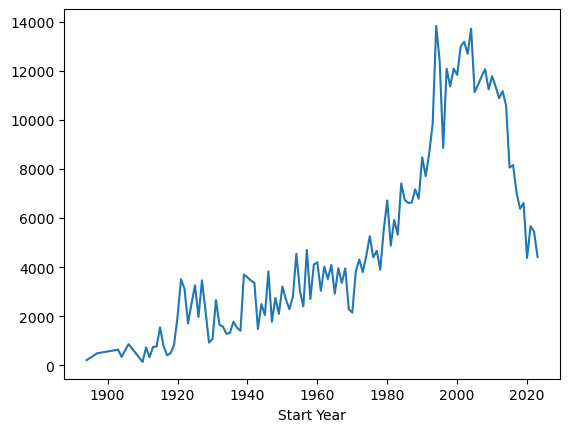

In [113]:
yearly_avg_ratings["Number of Ratings"].plot()

<Axes: xlabel='Start Year'>

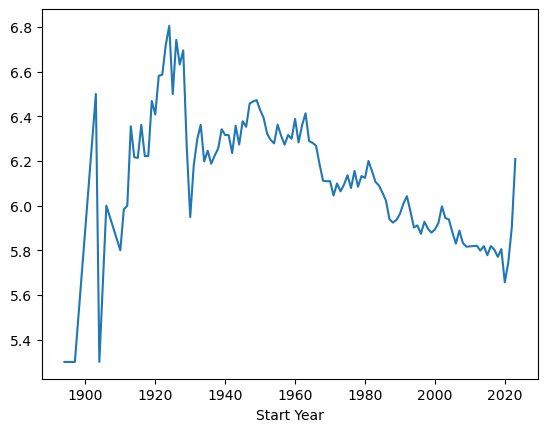

In [114]:
yearly_avg_ratings["Average Rating"].plot()

In [116]:
#Exploding genres to analyze the data by individual genres later

#create a copy of merged_df and name it merged_df2
merged_df2 = merged_df.copy()

# Split the 'Genres' column into a list of genres

merged_df2['Genres'] = merged_df2['Genres'].str.split(',')

# Explode the genres list into individual rows
exploded_genres_df = merged_df2.explode('Genres')

# Now, you can perform analyses on the exploded_genres_df DataFrame
# For example, to get the mean rating for each genre:
genre_mean_ratings = exploded_genres_df.groupby('Genres')['Average Rating'].mean()
genre_mean_ratings

Genres
Action        5.52
Adult         5.85
Adventure     5.76
Animation     6.36
Biography     6.76
Comedy        5.82
Crime         5.97
Documentary   7.04
Drama         6.17
Family        5.96
Fantasy       5.66
Film-Noir     6.51
Game-Show     4.80
History       6.68
Horror        4.77
Music         6.54
Musical       6.22
Mystery       5.72
News          7.10
Reality-TV    6.40
Romance       6.07
Sci-Fi        4.99
Sport         6.37
Talk-Show     7.07
Thriller      5.38
War           6.46
Western       5.86
Name: Average Rating, dtype: float64

In [120]:
len(exploded_genres_df['Genres'].unique())

27

In [127]:
# Group by 'Genres' and 'Start Year' and calculate the mean rating
genre_year_avg_rating = exploded_genres_df.groupby(['Genres', 'Start Year'])['Average Rating'].mean()

# Pivot the table for better readability (optional)
pivot_table = genre_year_avg_rating.unstack(level=0)

# Display the pivot table
print(pivot_table)

Genres      Action  Adult  Adventure  Animation  Biography  Comedy  Crime  \
Start Year                                                                  
1894           NaN    NaN        NaN        NaN        NaN     NaN    NaN   
1897           NaN    NaN        NaN        NaN        NaN     NaN    NaN   
1903           NaN    NaN        NaN        NaN       6.50     NaN    NaN   
1904           NaN    NaN        NaN        NaN        NaN     NaN    NaN   
1906          6.00    NaN       6.00        NaN       6.00     NaN    NaN   
...            ...    ...        ...        ...        ...     ...    ...   
2019          5.44   5.45       5.72       6.13       6.80    5.61   5.84   
2020          5.19    NaN       5.42       6.03       6.48    5.53   5.58   
2021          5.31    NaN       5.66       6.28       6.76    5.68   5.81   
2022          5.54    NaN       5.72       6.46       6.72    5.75   6.03   
2023          5.91    NaN       6.02       6.71       6.91    6.10   6.26   

In [135]:
#Selecting a subset of genres for analysis

selected_genres = ['Drama', 'Comedy', 'Action', 'Romance', 'Sci-Fi']  

# Filter the pivot table to include only the selected genres
filtered_pivot_table = pivot_table[selected_genres]



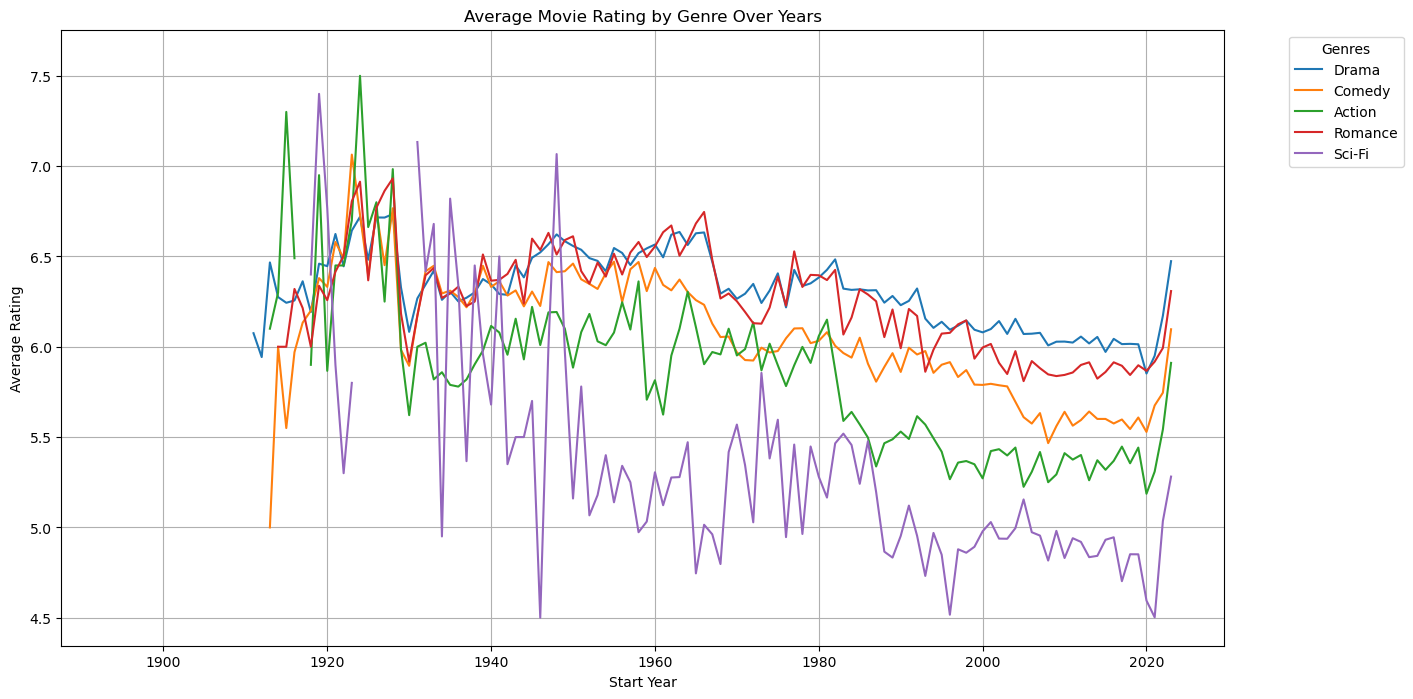

In [136]:
#plotting with all genres
#pivot_table.plot(kind='line', figsize=(15, 8))

#plotting results with subset of genres
filtered_pivot_table.plot(kind='line', figsize=(15, 8))


# Adding labels and title for clarity
plt.xlabel('Start Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating by Genre Over Years')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
#For exploratory analysis, you can group by year and genre, and adult movie --> could potentially import another dataset and have a look by countriy, region etc